<h1 style="font-size:35px;
        color:black;
        ">Exercise 2: Quantum Logic Gates</h1>

Prerequisite
- [Qiskit basics](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Ch.1.2 The Atoms of Computation](https://qiskit.org/textbook/ch-states/atoms-computation.html)

Other relevant materials
- [Access IBM Quantum Systems](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systems Configuration](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [Transpile](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum account](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html)  

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## **Exercise 1**

See 'Part 1' below, and find the circuits required for the:
* (a) `XOR` gate;
* (b) `AND` gate;
* (c) `NAND` gate;
* (d) `OR` gate.

## **Exercise 2**

See 'Part 2' below, and find a `layout` for which the AND gate compiles to 6 non-local gates for `ibmqx2`. Note that there is some randomness in the compiling process. So you might need to try a few times.

<h2 style="font-size:24px;">Part 1: Classical logic gates with quantum circuits</h2>

<br>

An implementation of the `NOT` gate is provided as an example.

In [ ]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [ ]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

<h3 style="font-size: 20px">&#128211; XOR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '0' when the inputs are equal and  '1' otherwise.

In [1]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    qc.cx(0,1)
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

XOR with inputs 0 0 gives output 0


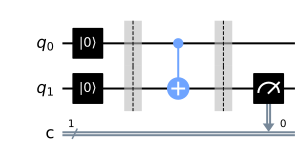



XOR with inputs 0 1 gives output 1


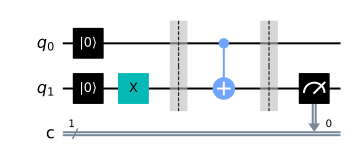



XOR with inputs 1 0 gives output 1


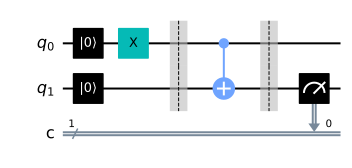



XOR with inputs 1 1 gives output 0


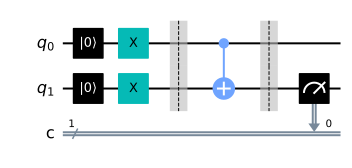

In [3]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; AND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'1'` only when both the inputs are `'1'`.

In [24]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # Make a logical and using quantum gates
    qc.ccx(0,1,2)

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

AND with inputs 0 0 gives output 0


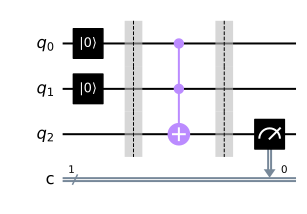



AND with inputs 0 1 gives output 0


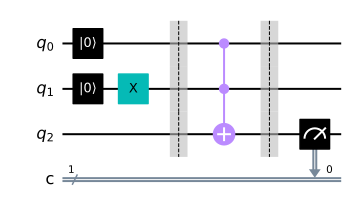



AND with inputs 1 0 gives output 0


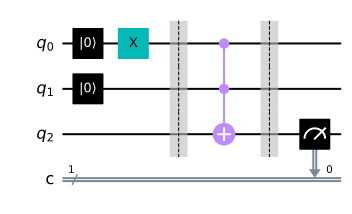



AND with inputs 1 1 gives output 1


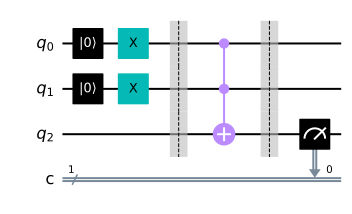

In [25]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; NAND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'0'` only when both the inputs are `'1'`.

In [26]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    qc.ccx(0,1,2)
    qc.x(2)
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

NAND with inputs 0 0 gives output 1


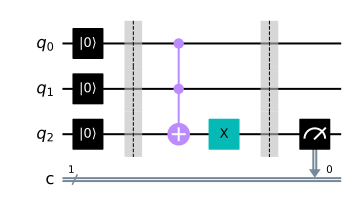



NAND with inputs 0 1 gives output 1


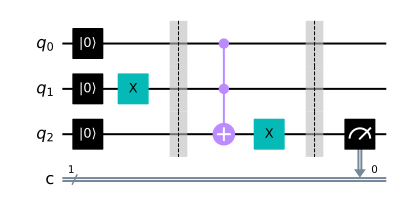



NAND with inputs 1 0 gives output 1


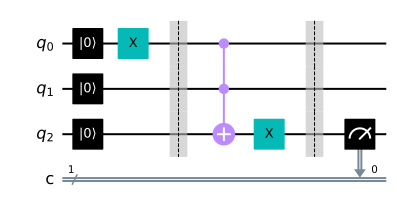



NAND with inputs 1 1 gives output 0


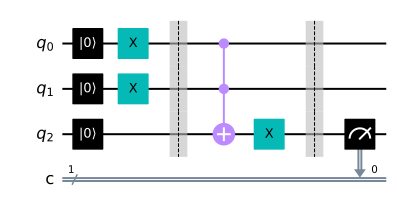

In [27]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; OR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '1' if either input is '1'.

In [36]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes

    qc.x(0)
    qc.x(1)
    qc.ccx(0,1,2)
    qc.x(2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

OR with inputs 0 0 gives output 0


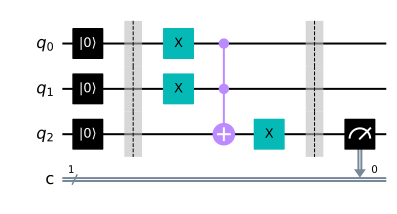



OR with inputs 0 1 gives output 1


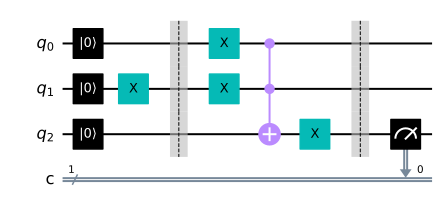



OR with inputs 1 0 gives output 1


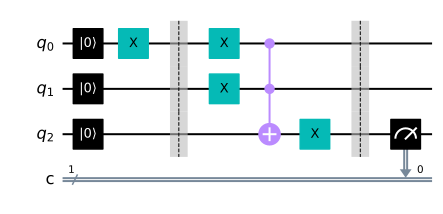



OR with inputs 1 1 gives output 1


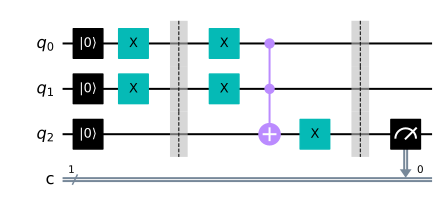

In [37]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h2 style="font-size:24px;">Part 2: AND gate on Quantum Computer</h2>
<br>

Real quantum computers are not able to implement arbitary gates directly. Instead, everything needs to be compiled  (or 'transpiled') to the set of basic gates that the device can use. This usually consists of a set of single qubit rotations, as well as two qubit gates like `cx`.

There are also limits on which `cx` gates can be used directly: only some pairs of control and target qubits are possible. To implement other `cx` gates, tricks such as using `swap` gates to effectively move information around must be used. The possible pairs of qubits on which `cx` gates can be applied is known as the 'connectivity' of the device.

We'll now look at some examples. To make sure you don't end up in a queue for a busy device, we'll be using mock backends. These are designed to act exactly like real backends.

In [53]:
from qiskit.test.mock import FakeYorktown
backend = FakeYorktown()

Upon executing the following cell you will be presented with a widget that displays all of the information about your choice of the backend.  You can obtain information that you need by clicking on the tabs. For example, backend status, number of qubits and the connectivity are under `configuration` tab, where as the `Error Map` tab will reveal the latest noise information for the system. 

In [52]:
import qiskit.tools.jupyter

backend

<FakeYorktown('fake_yorktown')>

The two system we are using (or at least pretending to) is `ibmqx2` (also known as `ibmq_yorktown`).

Here's a circuit that applies an `AND` gate, compiled into single and two qubit gates (assuming full connectivity).

AND gate


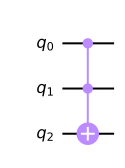



Transpiled AND gate with all the required connectiviy


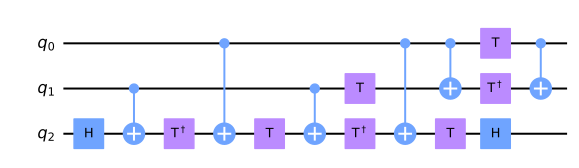

In [31]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the required connectiviy')
qc_and.decompose().draw()

This ideal transpilation requires 6 `cx` gates.

There are often optimizations that the transpiler can perform that reduce the overall gate count, and thus total length of the input circuits.  Note that the addition of swaps to match the device topology, and optimizations for reducing the length of a circuit are at odds with each other. In what follows we will make use of `initial_layout` that allows us to pick the qubits on a device used for the computation and `optimization_level`, an argument that allows selecting from internal defaults for circuit swap mapping and optimization methods to perform.

You can learn more about transpile function in depth [here](https://qiskit.org/documentation/apidoc/transpiler.html).

Rather than actually running the AND function, let's just look at the transpiled circuits. The following function does this for a given set of inputs.

In [43]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    
    return qc_trans

<h4 style="font-size: 16px">Three qubits on <code>ibmqx2</code> with the triangle connectivity</h4>
 
First, examine `ibmqx2` using the widget introduced earlier. Find the best set of three qubits to use for the `AND` gate, making best use of the connectivity.

In [51]:
# run this cell for the widget
backend

<FakeYorktown('fake_yorktown')>

<p>&#128211; Assign your choice of layout to the list variable <code>layout</code> in the cell below</p>

In [94]:
# Assign your choice of the initial_layout to the variable layout1 as a list 
# ex) layout = [0,2,4]
from itertools import combinations
layouts = set()
min_number_non_local_gates = 999 # initialize with a large number
for possible_layout in combinations(range(backend.configuration().n_qubits),3):
    num_gates =0
    for input1 in ['0','1']:
        for input2 in ['0','1']:
            qc_trans1 = AND(input1, input2, backend, possible_layout)
            num_gates = max(num_gates, qc_trans1.num_nonlocal_gates())
        if num_gates <= min_number_non_local_gates:
            min_number_non_local_gates = num_gates
            layouts.add(possible_layout)

In [95]:
print("Layouts: ", layouts)
print("Minimum number of non-local gates: ", min_number_non_local_gates)
layout = list(layouts)[0]

Layouts:  {(0, 1, 2), (2, 3, 4)}
Minimum number of non-local gates:  6


Compile the `AND` gate on `ibmqx2` by running the cell below.

In [92]:
print("Layout: ", layout)
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1 = AND(input1, input2, backend, layout) # use the first layout
                
        print('For input '+input1+input2)
        print('# of nonlocal gates =',qc_trans1.num_nonlocal_gates())


Layout:  (0, 1, 2)
For input 00
# of nonlocal gates = 6
For input 01
# of nonlocal gates = 6
For input 10
# of nonlocal gates = 6
For input 11
# of nonlocal gates = 6
